### Retail Data Analytics
### Cerina Liu - 4/28/2021


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score, recall_score
from dmba import regressionSummary, exhaustive_search
from dmba import classificationSummary, gainsChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
import statsmodels.formula.api as sm
from time import perf_counter
from tabulate import tabulate
import random
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate
from astropy.table import QTable, Table, Column

no display found. Using non-interactive Agg backend


# 1. About the Dataset
This retail dataset contains historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday. 
● Sources of data: from Kaggle Manjeet Singh

# 2. Problem Statement outline: 

Topic: Predict the department-wide sales for each store for the following year

Part one: Machine learning Model practice (04/18/2021)
1. Data description 
2. Data cleaning
3. Data viuslization 
3. Dimension Reduction
4. Regression modelling: LinearRegression, Ridge, Lasso,BayesianRidge. Conduct PCA, NON-PCA analysis.
5. Random variable tests

Part two: Improvement (07/28/2021)
1. Data cleaning and viuslization 
2. Data exploration analysis


# 3. Data description 
### About Column
Store: the store number

Date: the week

Temperature: average temperature in the region Fuel_Price: cost of fuel in the region

MarkDown1-5: anonymized data related to promotional markdowns. (MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA)

CPI: the consumer price index

Unemployment: the unemployment rate

IsHoliday: whether the week is a special holiday week Weekly_Sales: sales for the given department in the given store Dept: the department number


### Feature-sale-store Dataset"

In [3]:
ft = pd.read_csv('Features data set.csv')
sale = pd.read_csv('sales data-set.csv') 
store = pd.read_csv('stores data-set.csv') 

### Part one - 1. Describe Dataset

In [4]:
print(ft.dtypes,'\n')
print(sale.dtypes,'\n')
print(store.dtypes,'\n')

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object 

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object 

Store     int64
Type     object
Size      int64
dtype: object 



In [5]:
ft.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


In [6]:
sale.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


In [7]:
store.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


### Part one - 2. Clean data

In [8]:
df_stores_features = store.merge(right = ft, on = 'Store')
df_merge = df_stores_features.merge(right = sale, on = ['Store', 'Date', 'IsHoliday'])
df_merge.sample(10)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
302123,31,A,203750,11/05/2012,74.14,3.688,13797.91,NaN,8.64,2960.85,3794.93,221.363221,6.891,False,40,55426.03
141251,15,B,123737,17/12/2010,25.30,3.301,NaN,NaN,NaN,NaN,NaN,132.680452,8.067,False,28,855.07
80620,9,B,125833,17/09/2010,81.19,2.582,NaN,NaN,NaN,NaN,NaN,215.061529,6.442,False,19,1228.70
127713,13,A,219622,21/09/2012,67.96,3.821,10671.71,141.83,46.00,2465.37,12372.29,131.010333,5.765,False,98,15094.37
230200,24,A,203819,24/12/2010,27.74,3.309,NaN,NaN,NaN,NaN,NaN,132.747742,8.275,False,80,32533.13
68121,7,B,70713,24/08/2012,59.27,3.558,2534.52,19.60,1.86,1627.26,3915.85,198.098420,7.872,False,67,3820.84
131171,14,A,200898,03/12/2010,40.93,3.046,NaN,NaN,NaN,NaN,NaN,182.667615,8.724,False,94,48675.37
27491,3,B,37392,16/03/2012,64.00,3.734,2588.06,80.89,3.20,909.76,491.83,224.716695,6.833,False,82,7842.91
116325,12,B,112238,22/06/2012,91.61,4.014,10233.14,67.60,3.65,4693.44,3618.64,130.792900,11.627,False,12,3959.12
89019,10,B,126512,25/06/2010,90.32,3.084,NaN,NaN,NaN,NaN,NaN,126.126600,9.524,False,26,13317.02


In [9]:
df_merge.describe()
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


### Part one - 2.2 Replace Nah value with Mean

In [10]:
df_merge.isnull().sum()

Store                0
Type                 0
Size                 0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
dtype: int64

In [11]:
MD = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for column in MD:
    df_merge[column].fillna((df_merge[column].mean()), inplace=True)
df_merge.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,1,24924.50
1,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,2,50605.27
2,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,3,13740.12
3,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,4,39954.04
4,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,5,32229.38


In [12]:
df_merge

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,1,24924.50
1,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,2,50605.27
2,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,3,13740.12
3,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,4,39954.04
4,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,93,2487.80
421566,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,94,5203.31
421567,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,95,56017.47
421568,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,97,6817.48


In [13]:
#check null values 
df_merge.isnull().sum()

Store           0
Type            0
Size            0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
dtype: int64

In [14]:
df_merge[["day", "month", "year"]] = df_merge["Date"].str.split("/", expand = True)
df_merge['DateValue']=pd.to_datetime(df_merge[['year','month','day']])
df_merge

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,day,month,year,DateValue
0,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,1,24924.50,05,02,2010,2010-02-05
1,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,2,50605.27,05,02,2010,2010-02-05
2,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,3,13740.12,05,02,2010,2010-02-05
3,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,4,39954.04,05,02,2010,2010-02-05
4,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,5,32229.38,05,02,2010,2010-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,93,2487.80,26,10,2012,2012-10-26
421566,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,94,5203.31,26,10,2012,2012-10-26
421567,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,95,56017.47,26,10,2012,2012-10-26
421568,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,97,6817.48,26,10,2012,2012-10-26


### Part one - 3. Data Visualization

In [15]:
%matplotlib inline

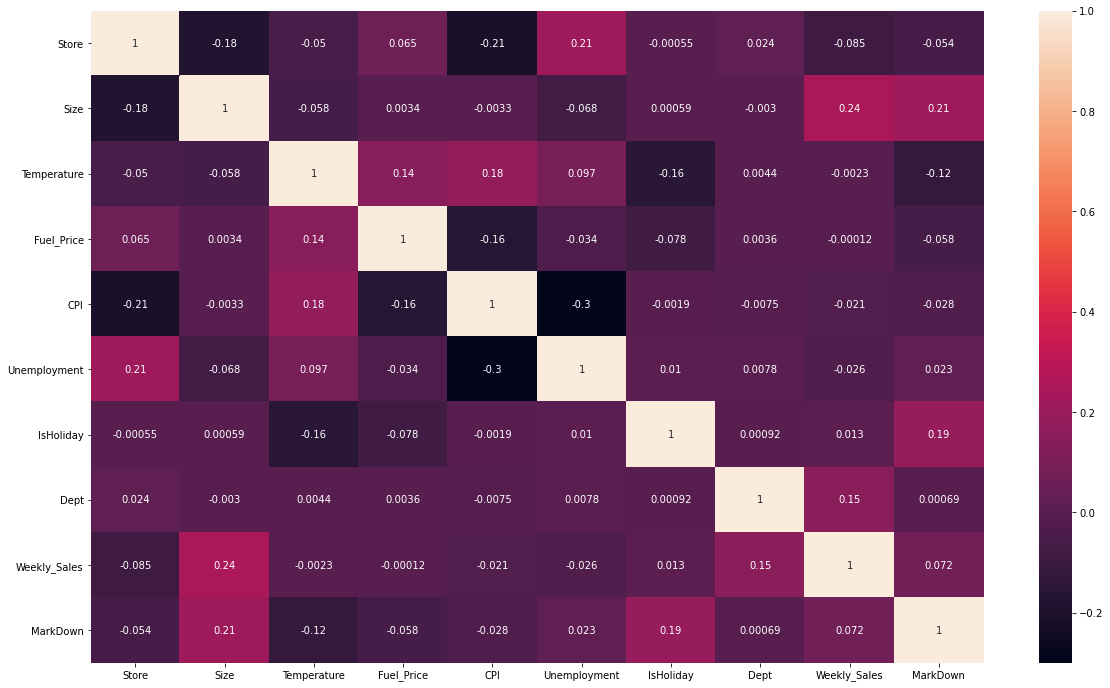

In [16]:
df_temp = df_merge.copy(deep=True)
df_temp['MarkDown'] = df_temp['MarkDown1'] + df_temp['MarkDown2'] +df_temp['MarkDown3'] +df_temp['MarkDown4'] + df_temp['MarkDown5']
df_temp.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace = True, axis = 1)
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_temp.corr(),annot=True)
# df_temp.head

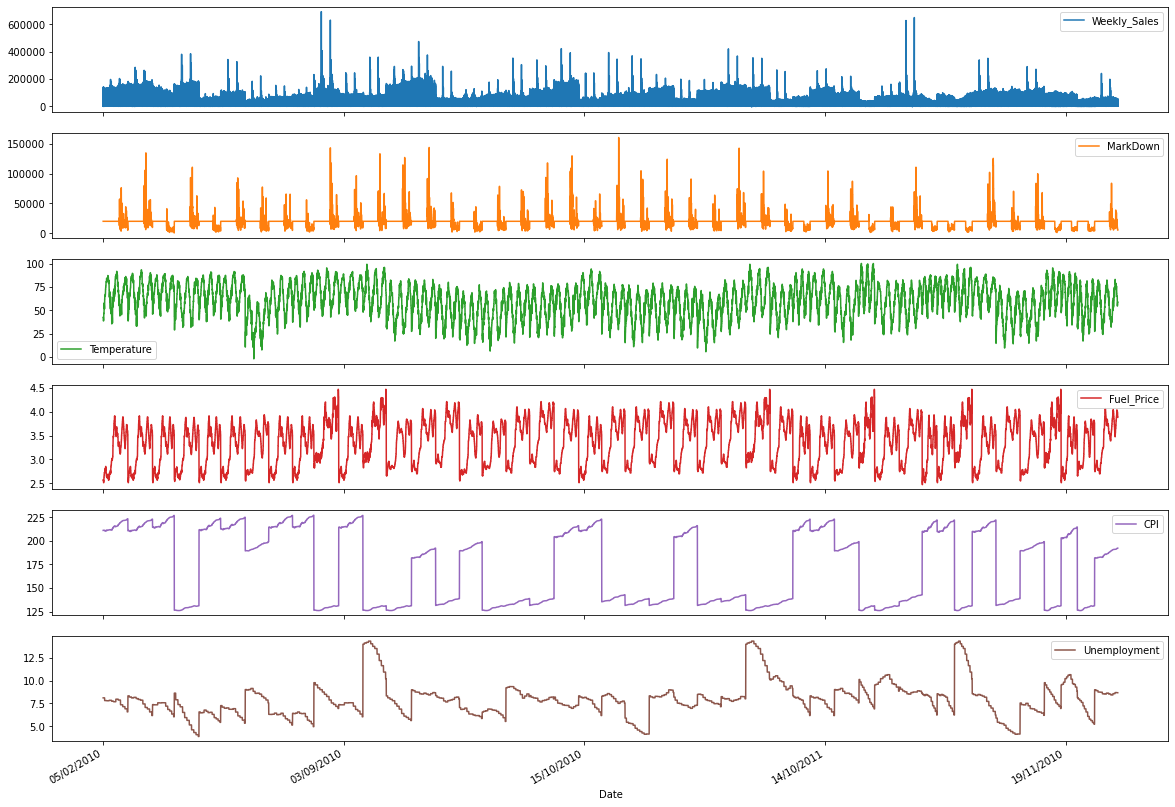

In [17]:
df_temp[['Weekly_Sales','Date', 'MarkDown','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

### Part one - 4. Reduce dimension：Method 1

In [18]:
df_merge[["day", "month", "year"]] = df_merge["Date"].str.split("/", expand = True)
df_merge['DateValue']=pd.to_datetime(df_merge[['year','month','day']])
df_merge

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,day,month,year,DateValue
0,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,1,24924.50,05,02,2010,2010-02-05
1,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,2,50605.27,05,02,2010,2010-02-05
2,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,3,13740.12,05,02,2010,2010-02-05
3,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,4,39954.04,05,02,2010,2010-02-05
4,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,5,32229.38,05,02,2010,2010-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,93,2487.80,26,10,2012,2012-10-26
421566,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,94,5203.31,26,10,2012,2012-10-26
421567,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,95,56017.47,26,10,2012,2012-10-26
421568,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667,False,97,6817.48,26,10,2012,2012-10-26


In [19]:
df_merge["Week"] = df_merge.DateValue.dt.weekofyear
df_merge

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,day,month,year,DateValue,Week
0,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,...,211.096358,8.106,False,1,24924.50,05,02,2010,2010-02-05,5
1,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,...,211.096358,8.106,False,2,50605.27,05,02,2010,2010-02-05,5
2,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,...,211.096358,8.106,False,3,13740.12,05,02,2010,2010-02-05,5
3,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,...,211.096358,8.106,False,4,39954.04,05,02,2010,2010-02-05,5
4,1,A,151315,05/02/2010,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,...,211.096358,8.106,False,5,32229.38,05,02,2010,2010-02-05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,...,192.308899,8.667,False,93,2487.80,26,10,2012,2012-10-26,43
421566,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,...,192.308899,8.667,False,94,5203.31,26,10,2012,2012-10-26,43
421567,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,...,192.308899,8.667,False,95,56017.47,26,10,2012,2012-10-26,43
421568,45,B,118221,26/10/2012,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,...,192.308899,8.667,False,97,6817.48,26,10,2012,2012-10-26,43


In [20]:
predictors = ["Week","Size","Temperature","Fuel_Price",
             "MarkDown1","MarkDown2","MarkDown3","MarkDown4",'MarkDown5','CPI','Unemployment','Dept']
x = df_merge[predictors]
y = df_merge["Weekly_Sales"]

In [21]:
df_pca = df_merge[["Week","Size","Temperature","Fuel_Price",
             "MarkDown1","MarkDown2","MarkDown3","MarkDown4",'MarkDown5','CPI','Unemployment','Weekly_Sales']]

In [22]:
pcs = PCA()
pcs.fit(df_pca.iloc[:, 0:])
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Standard deviation,61282.2448,21922.8251,5933.4664,5301.7848,4831.7872,3471.5106,1848.9442,39.2546,18.4697,12.9247,1.7447,0.4383
Proportion of variance,0.8657,0.1108,0.0081,0.0065,0.0054,0.0028,0.0008,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.8657,0.9765,0.9846,0.9911,0.9964,0.9992,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Part one - 4. Reduce dimension：Method 2

In [23]:
predictors = ["Week","Size","Temperature","Fuel_Price",
             "MarkDown1","MarkDown2","MarkDown3","MarkDown4",'MarkDown5','CPI','Unemployment','Dept']
x = df_merge[predictors]
y = df_merge["Weekly_Sales"]

In [24]:
# Standardizing the features
X = StandardScaler().fit_transform(x)
#reduce deminsion to 2 only
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2'])

In [25]:
#new dataset using PCA
newPCA = pd.concat([principalDf, y], axis = 1)
newPCA

,pca1,pca2,Weekly_Sales
0,0.419937,0.175026,24924.50
1,0.419924,0.174331,50605.27
2,0.419911,0.173636,13740.12
3,0.419898,0.172941,39954.04
4,0.419885,0.172247,32229.38
...,...,...,...
421565,-1.554772,0.022955,2487.80
421566,-1.554785,0.022260,5203.31
421567,-1.554798,0.021565,56017.47
421568,-1.554824,0.020176,6817.48


### Part one - 5. Machine learning models: regressions

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso,BayesianRidge

### Non-PCA

In [27]:
xdata = df_merge[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                     'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Size']]
ydata = newPCA["Weekly_Sales"]
xTrain,xTest,yTrain,yTest = train_test_split(xdata,ydata,test_size=0.2,random_state=42)

In [28]:
lr = LinearRegression().fit(xTrain,yTrain)
ridge = Ridge(normalize=True).fit(xTrain,yTrain)
lasso = Lasso(normalize = True).fit(xTrain,yTrain)
bayes = BayesianRidge(normalize=True).fit(xTrain,yTrain)

In [29]:
def get_model_data(xTest,yTest,model,model_name):

    startTime = perf_counter()
    a = model.score(xTest,yTest)
    print("Test Score:",a)
    
    b = cross_val_score(model,xTest,yTest,cv=10).mean()
    print("Test Score(Cross Validation):",b)
    endTime = perf_counter()
    print()

    y_pred = cross_val_predict(model,xTest,yTest,cv=10)
#    confusion_matrix(yTest, y_pred)
#    print()

    print()
    time = endTime-startTime
    print("Total time:",time)
    print()
    v = [model_name,round(a,3),round(b,3),round(time,3)]
    return v

In [30]:
models = [lr,ridge,lasso,bayes]

model_name = ["Linear Regression","Ridge Regression","LASSO Regression",'Bayesian Ridge Regression']

In [31]:
table_vector = []

In [32]:
i=0

for model in models:
    print("-------------------------------")
    print(model_name[i])
    print("-------------------------------")
    v = get_model_data(xTest,yTest,model,model_name[i])
    table_vector.append(v)
    i=i+1    

-------------------------------
Linear Regression
-------------------------------
Test Score: 0.06258860256721777
Test Score(Cross Validation): 0.062245497204286016


Total time: 0.8004379569999855

-------------------------------
Ridge Regression
-------------------------------
Test Score: 0.046903300551248694
Test Score(Cross Validation): 0.04736781703390043


Total time: 0.6744555209997998

-------------------------------
LASSO Regression
-------------------------------
Test Score: 0.059327894382021906
Test Score(Cross Validation): 0.061001217703772925


Total time: 1.0138740400000188

-------------------------------
Bayesian Ridge Regression
-------------------------------
Test Score: 0.06258725740629201
Test Score(Cross Validation): 0.062246433187624725


Total time: 0.9459243459998561



In [33]:
results = pd.DataFrame(data=table_vector,columns=['Model','Test Score','TestScore','Time'])
results[['Model','Test Score','TestScore','Time']]

,Model,Test Score,TestScore,Time
0,Linear Regression,0.063,0.062,0.800
1,Ridge Regression,0.047,0.047,0.674
2,LASSO Regression,0.059,0.061,1.014
3,Bayesian Ridge Regression,0.063,0.062,0.946


<function matplotlib.pyplot.show(*args, **kw)>

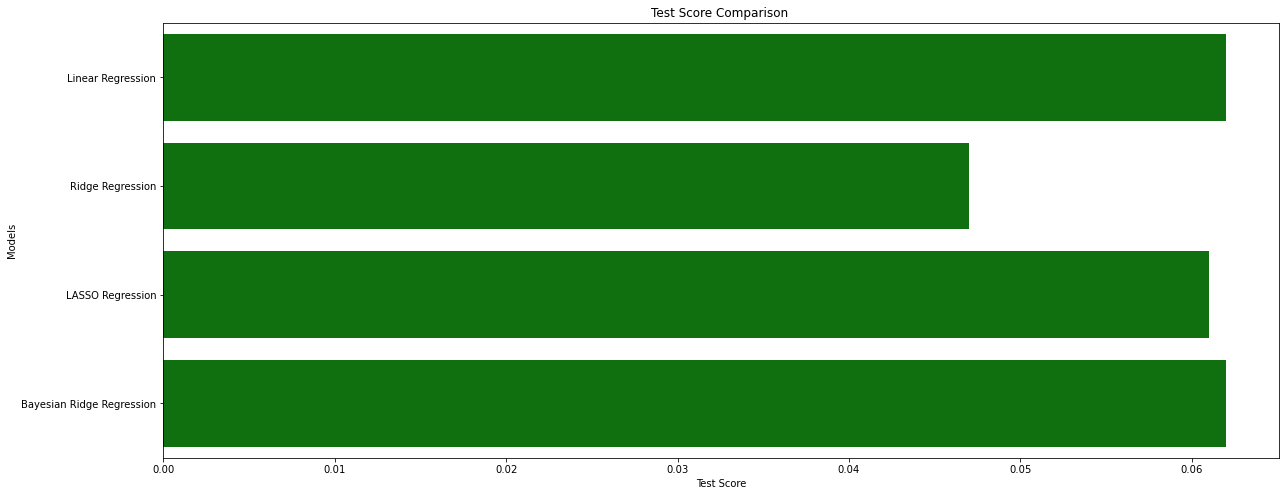

In [34]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x = 'TestScore',y= 'Model',data=results,color = 'g')
plt.xlabel("Test Score")
plt.ylabel("Models")
plt.title("Test Score Comparison ")
plt.show

### PCA

In [35]:
PCA_predictors = ["pca1","pca2"]
xPCA = newPCA[PCA_predictors]
yPCA = newPCA["Weekly_Sales"]

xTrain,xTest,yTrain,yTest = train_test_split(xPCA,yPCA,test_size=0.2,random_state=42)

In [36]:
lr = LinearRegression().fit(xTrain,yTrain)
ridge = Ridge(normalize=True).fit(xTrain,yTrain)
lasso = Lasso(normalize = True).fit(xTrain,yTrain)
bayes = BayesianRidge(normalize=True).fit(xTrain,yTrain)

In [37]:
def get_model_data(xTest,yTest,model,model_name):

    startTime = perf_counter()
    a = model.score(xTest,yTest)
    print("Test Score:",a)
    
    b = cross_val_score(model,xTest,yTest,cv=10).mean()
    print("Test Score(Cross Validation):",b)
    endTime = perf_counter()
    print()

    y_pred = cross_val_predict(model,xTest,yTest,cv=10)
#    confusion_matrix(yTest, y_pred)
#    print()

    print()
    time = endTime-startTime
    print("Total time:",time)
    print()
    v = [model_name,round(a,3),round(b,3),round(time,3)]
    return v

In [38]:
models = [lr,ridge,lasso,bayes]

model_name = ["Linear Regression (PCA)","Ridge Regression (PCA)","LASSO Regression (PCA)",'Bayesian Ridge Regression (PCA)']

In [39]:
table_vector = []

In [40]:
i=0

for model in models:
    print("-------------------------------")
    print(model_name[i])
    print("-------------------------------")
    v = get_model_data(xTest,yTest,model,model_name[i])
    table_vector.append(v)
    i=i+1    

-------------------------------
Linear Regression (PCA)
-------------------------------
Test Score: 0.009367133035923514
Test Score(Cross Validation): 0.009243065286892293


Total time: 0.10508797000011327

-------------------------------
Ridge Regression (PCA)
-------------------------------
Test Score: 0.006893630800923645
Test Score(Cross Validation): 0.006940725295311733


Total time: 0.0824459810000917

-------------------------------
LASSO Regression (PCA)
-------------------------------
Test Score: 0.007790993296853843
Test Score(Cross Validation): 0.008965813568919035


Total time: 0.0812060929999916

-------------------------------
Bayesian Ridge Regression (PCA)
-------------------------------
Test Score: 0.009366815704885179
Test Score(Cross Validation): 0.009243184242640956


Total time: 0.11651082899993526



In [41]:
results = pd.DataFrame(data=table_vector,columns=['Model','Test Score','TestScore(Cross Validation)','Time'])
results[['Model','Test Score','TestScore(Cross Validation)','Time']]

,Model,Test Score,TestScore(Cross Validation),Time
0,Linear Regression (PCA),0.009,0.009,0.105
1,Ridge Regression (PCA),0.007,0.007,0.082
2,LASSO Regression (PCA),0.008,0.009,0.081
3,Bayesian Ridge Regression (PCA),0.009,0.009,0.117


<function matplotlib.pyplot.show(*args, **kw)>

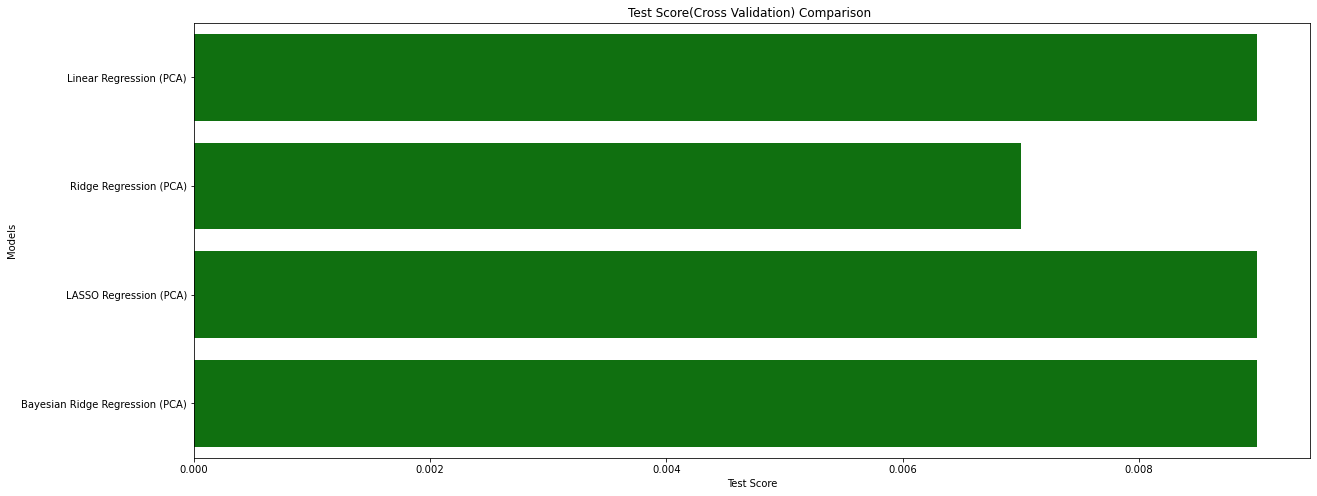

In [42]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x = 'TestScore(Cross Validation)',y= 'Model',data=results,color = 'g')
plt.xlabel("Test Score")
plt.ylabel("Models")
plt.title("Test Score(Cross Validation) Comparison ")
plt.show

### Part one - 6. Random variables

In [44]:
def is_integer(n):
    if isinstance(n, int):
        return True
    if isinstance(n, float):
        return n.is_integer()
    return False

In [45]:
def generate_random_data(size,data,predictors):
    df=pd.DataFrame()
    for predictor in predictors:
        a=data[predictor].min()
        b=data[predictor].max()
    
        if(is_integer(a)==True):
            randomlist = []
            for i in range(size):
                x = random.randint(a,b)
                randomlist.append(x)
            df[predictor]=randomlist
        elif(is_integer(a)==False):
            randomlist = []
            for i in range(size):
                x = round(random.uniform(a, b),3)
                randomlist.append(x)
            df[predictor]=randomlist
    outcomelist = []
    return df

In [46]:
variables_use = df_merge[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size','Weekly_Sales']]
new_data = generate_random_data(200,df_merge,variables_use)

In [47]:
new_random= new_data.sample(frac=1).reset_index(drop=True)
new_random

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales
0,58.498,3.765,23621.185,82932.397,125282.535,58812.180,78958.335,216.713,7.531,121864,1672.431
1,58.151,2.689,53063.616,91638.749,82588.714,53190.486,6014.786,203.709,4.145,84939,329646.173
2,10.274,3.223,17689.771,64064.120,107344.560,16863.013,9654.283,169.973,12.412,72801,637622.636
3,71.521,3.566,84010.396,37338.735,30903.150,42712.375,67212.876,158.364,4.540,62775,515634.651
4,84.525,4.342,7800.133,32308.773,49556.613,30132.215,7385.397,180.312,4.264,157739,424923.577
...,...,...,...,...,...,...,...,...,...,...,...
195,79.228,3.607,44919.235,60634.309,36726.994,39909.501,56654.828,164.246,7.194,85476,690890.186
196,50.184,3.712,34623.693,68686.308,58634.314,17067.083,81836.112,149.050,13.078,199946,39374.481
197,80.613,4.284,13752.149,33431.399,33521.121,44533.689,64710.385,154.007,10.824,211460,552757.699
198,41.925,3.078,8570.646,84104.655,70910.646,720.758,25826.737,225.891,12.844,98773,340635.614


In [48]:
x_random = new_random[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']]
y_random = new_random['Weekly_Sales']
bys = BayesianRidge(normalize=True).fit(x_random,y_random)

In [49]:
print('Bayesian Ridge Regression')
v = get_model_data(x_random,y_random,bys,'Bayesian Ridge Regression ')

Bayesian Ridge Regression
Test Score: 1.8129941992128806e-12
Test Score(Cross Validation): -0.009698139768451153


Total time: 0.06333988799997314



In [79]:
from astropy.table import QTable, Table, Column
t = Table()
t['Model'] = ['Logistic Regression(PCA)','KNeighbors Classifier(PCA)']
t['Time(s)'] = ['71','68']
t['Test Score'] = ['55.0%','55.0%']
t['Test Score(Cross Validation)'] = ['85.00%','84.67%']
t

Model,Time(s),Test Score,Test Score(Cross Validation)
str26,str2,str5,str6
Logistic Regression(PCA),71,55.0%,85.00%
KNeighbors Classifier(PCA),68,55.0%,84.67%


### 07/08/2021- Data cleaning and visulization improvement 

In [51]:
feature_df = pd.read_csv("Features data set.csv", parse_dates=['Date'])
sales_df = pd.read_csv("sales data-set.csv", parse_dates=['Date'])
stores_df = pd.read_csv("stores data-set.csv")

In [52]:
feature_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


In [53]:
retail_df = pd.merge(sales_df, feature_df, on = ["Store", "Date", "IsHoliday"], how = "inner")
retail_df = pd.merge(retail_df, stores_df, on = ["Store"], how = "inner")

In [59]:
retail_df.head(10)
retail_df.shape
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [60]:
def any_missing(df):
    return df.isnull().values.any()

def missing_col(df):
    assert any_missing(df)
    null_df = retail_df.isnull().any()
    missing_col = null_df[null_df.values].index.to_list()
    return missing_col

missing_columns = missing_col(retail_df)
missing_columns

['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

In [61]:
quant_list = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Size"]

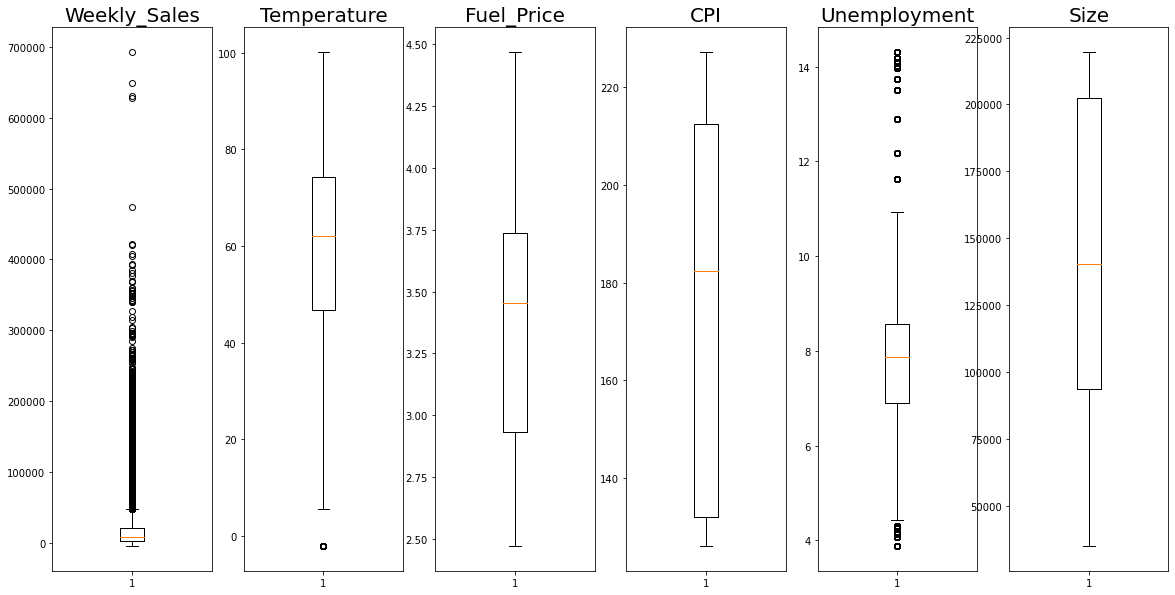

In [62]:
plt.figure(figsize=(20,10))

for i in range(len(quant_list)):
    plt.subplot(1, len(quant_list), i+1) 
    plt.boxplot(retail_df[quant_list[i]]) 
    plt.title(quant_list[i],fontsize=20)
    
plt.show()

In [63]:
# Quoted(and modified) from https://towardsdatascience.com/cleaner-data-analysis-with-pandas-using-pipes-4d73770fbf3c

def copy_df(df):
    return df.copy()

# if we have a column that contains more than half NaN values, we chose to drop it
def drop_null(df):
    threshold = len(df) * 0.5
    df = df.dropna(axis = 1, thresh = threshold)
    return df

# one way to deal with missing values
def median_inpute(df, columns):
    median = df[columns].median()
    df = df.fillna(median)
    return df
        
# here we select data only within 0.05 and 0.95 quantile
def remove_outliers(df, column):
    low = np.quantile(df[column], 0.05)
    high = np.quantile(df[column], 0.95)
    return df[df[column].between(low, high, inclusive = True)]

# change "object" to "category" dtype to save memory space
def to_category(df):
    cols = df.select_dtypes(include="object").columns
    for c in cols:
        cat_ratio = len(df[c].value_counts()) / len(df)
        if cat_ratio < 0.05:
            df[c] = df[c].astype("category")
    return df

In [64]:
retail = (retail_df.pipe(copy_df).
            pipe(drop_null).
            pipe(to_category))

In [65]:
retail = (retail.pipe(remove_outliers, "Weekly_Sales")
          .pipe(remove_outliers, "Unemployment")
          .pipe(remove_outliers, "Temperature"))

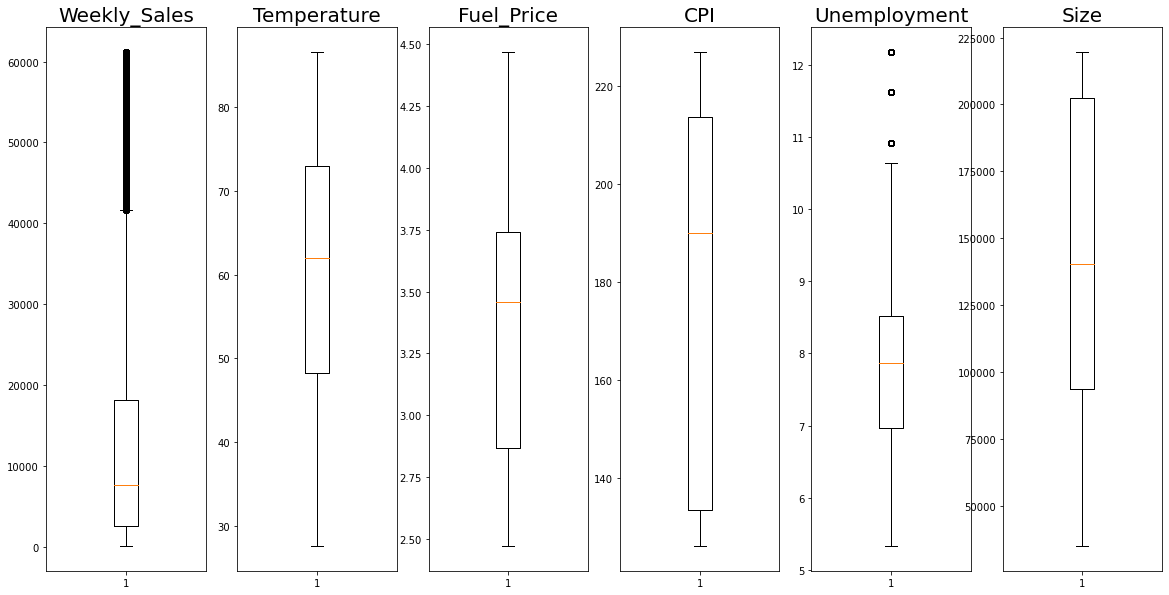

In [66]:
plt.figure(figsize=(20,10))

for i in range(len(quant_list)):
    plt.subplot(1, len(quant_list), i+1) 
    plt.boxplot(retail[quant_list[i]]) 
    plt.title(quant_list[i],fontsize=20)

In [67]:
retail["Week_of_Year"] = retail["Date"].dt.weekofyear
retail["Month_of_Year"] = retail["Date"].dt.month
retail["Year"] = retail["Date"].dt.year
retail["Day"] = retail["Date"].dt.day

In [68]:
retail.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week_of_Year,Month_of_Year,Year,Day
0,1,1,2010-05-02,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,17,5,2010,2
1,1,2,2010-05-02,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,17,5,2010,2
2,1,3,2010-05-02,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,17,5,2010,2
3,1,4,2010-05-02,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,17,5,2010,2
4,1,5,2010-05-02,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,17,5,2010,2


### 07-08-2021 Data exploration improvement

In [70]:
date_group = retail.groupby("Date").sum().reset_index()
date_group.head()


,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Week_of_Year,Month_of_Year,Year,Day
0,2010-01-10,49633,100412,28459652.53,0.0,159875.74,6361.660,408639.156883,19119.974,328143121,2349,2349,4721490,23490
1,2010-02-04,54262,105723,33512973.89,0.0,128328.71,6924.475,420955.322754,19844.454,338591972,12340,4936,4960680,9872
2,2010-02-07,50575,98870,31497068.71,0.0,172354.23,6397.652,402345.473434,18312.132,325574064,11595,4638,4661190,16233
3,2010-02-19,43426,84834,26394900.13,0.0,76272.51,5269.110,338104.241628,16524.686,278420079,13895,3970,3989850,37715
4,2010-02-26,45256,89546,26027718.40,0.0,85095.42,5640.758,358785.063010,17263.026,292959248,16808,4202,4223010,54626


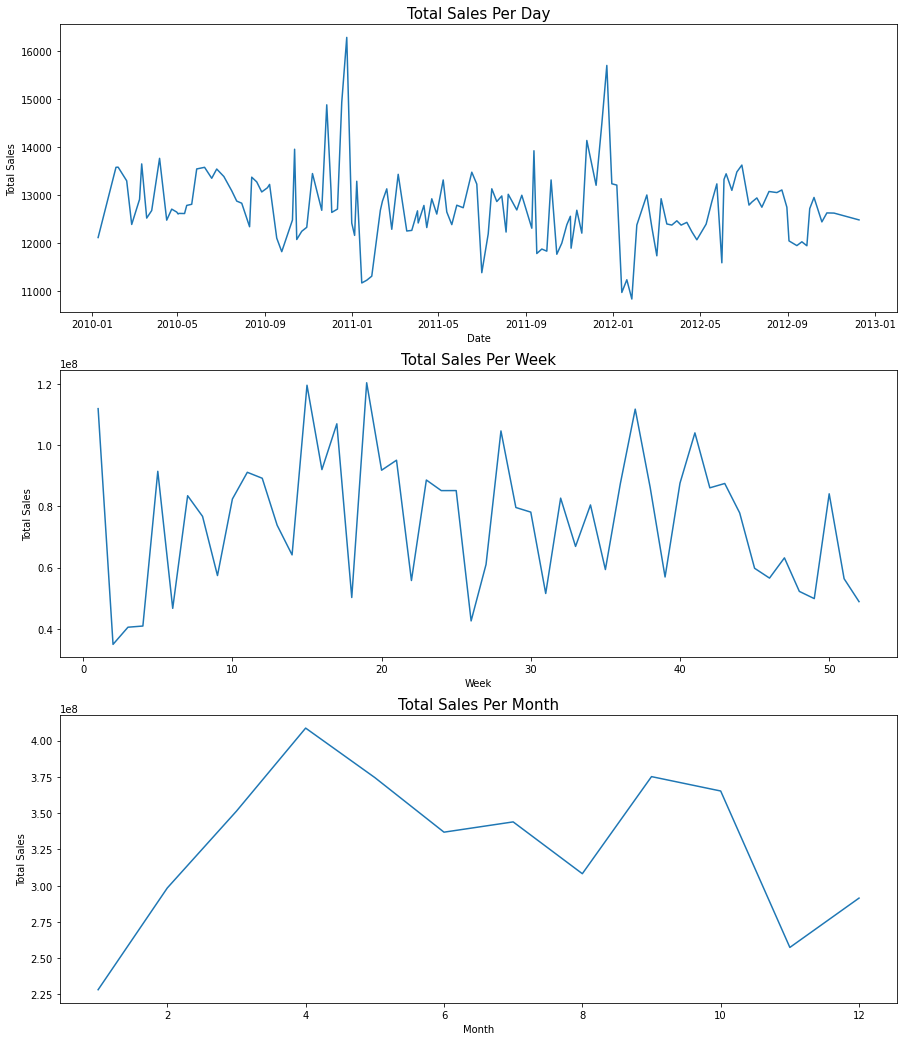

In [74]:
# Total Sales Grouped by Date, Week, and Month¶
# axis_font = {'size':'15'}
axis_title = {'size':'15'}

plt.figure(figsize=(15, 18))

plt.subplot(3, 1, 1)
plt.plot(date_group["Date"], date_group["Weekly_Sales"])
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Total Sales Per Day" , **axis_title)

plt.subplot(3, 1, 2)
month_group = retail.groupby("Week_of_Year").sum().reset_index()
plt.plot(month_group["Week_of_Year"], month_group["Weekly_Sales"])
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.title("Total Sales Per Week" , **axis_title)

plt.subplot(3, 1, 3)
month_group = retail.groupby("Month_of_Year").sum().reset_index()
plt.plot(month_group["Month_of_Year"], month_group["Weekly_Sales"])
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales Per Month" , **axis_title)

plt.show()

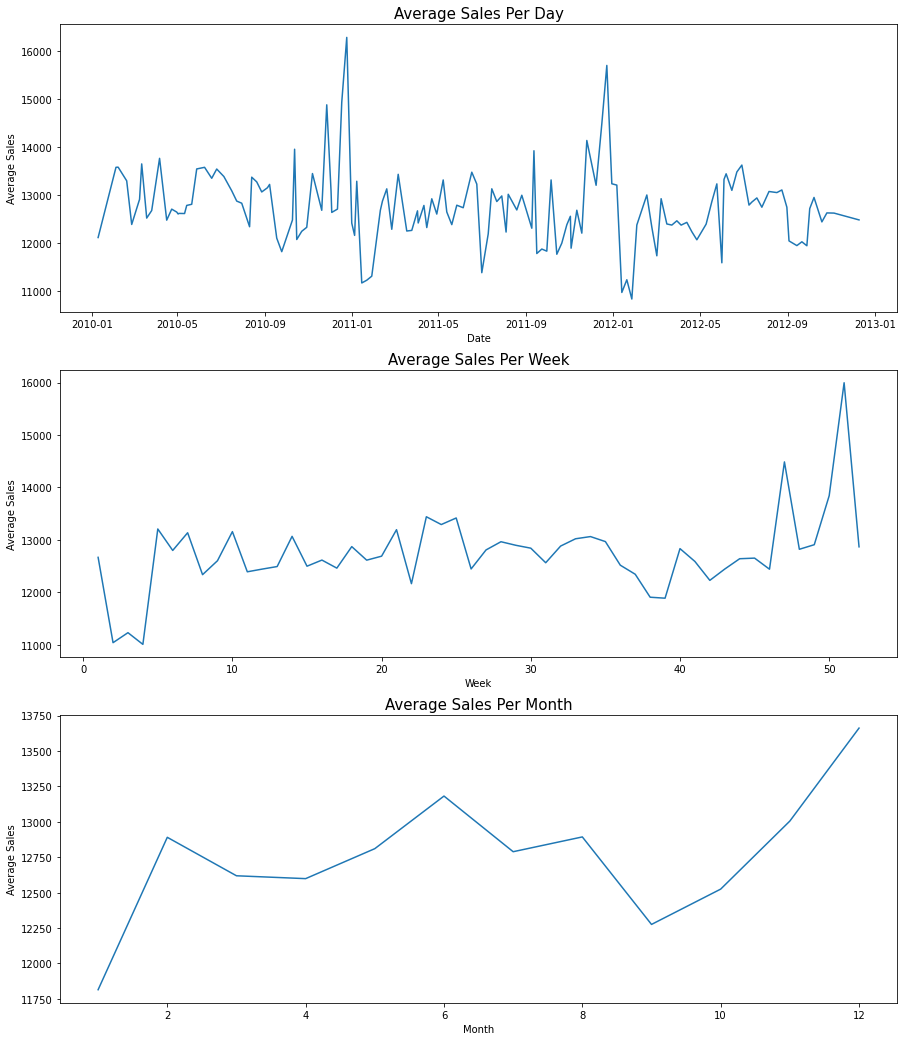

In [73]:

# Average Sales Grouped by Date, Week, and Month¶

plt.figure(figsize=(15, 18))

plt.subplot(3, 1, 1)
date_group = retail.groupby("Date").mean().reset_index()
plt.plot(date_group["Date"], date_group["Weekly_Sales"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.title("Average Sales Per Day" , **axis_title)

plt.subplot(3, 1, 2)
month_group = retail.groupby("Week_of_Year").mean().reset_index()
plt.plot(month_group["Week_of_Year"], month_group["Weekly_Sales"])
plt.xlabel("Week")
plt.ylabel("Average Sales")
plt.title("Average Sales Per Week" , **axis_title)

plt.subplot(3, 1, 3)
month_group = retail.groupby("Month_of_Year").mean().reset_index()
plt.plot(month_group["Month_of_Year"], month_group["Weekly_Sales"])
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Average Sales Per Month" , **axis_title)

plt.show()

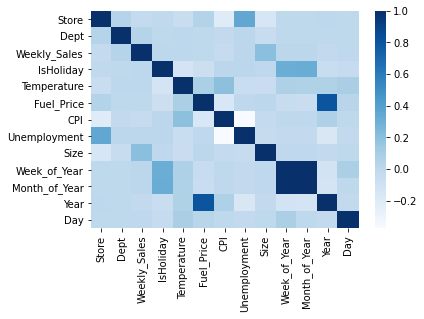

In [77]:
#Pairwise Relationship¶
sns.heatmap(retail.corr(), cmap="Blues")